## Plan: 
   ### - Introduction
   ### - Libraries used
   ### - Sample code
   ### - Usecases for different features application in practical tasks

Comment: 
    On final presentation I suppose to add some more examples of application usage if needed accordint to timescale

# Introduction

Rem: tutorial and explanatory materials from [https://prism.ucalgary.ca/handle/1880/51900]

What is texture? 
Everyday texture terms - rough, silky, bumpy - refer to touch.

A texture that is rough to touch has:

a large difference between high and low points, and
a space between highs and lows approximately the same size as a finger.

Silky would have little difference between high and low points, and
the differences would be spaced very close together relative to finger size.

Image texture works in the same way, except the highs and lows are brightness values (also called grey levels, GL,  or digital numbers, DN) instead of elevation changes. Instead of probing a finger over the surface, a "window" - a (usually square) box defining the size of the probe - is used.

Textures in images quantify:

Grey level differences (contrast)
Defined size of area where change occurs (window)
Directionality or lack of it.

## Order:

The GLCM described here is used for a series of "second order" texture calculations.

First order texture measures are statistics calculated from the original image values, like variance, and do not consider pixel neighbour relationships.
Second order measures consider the relationship between groups of two (usually neighbouring) pixels in the original image.
Third and higher order textures (considering the relationships among three or more pixels) are theoretically possible but not commonly implemented due to calculation time and interpretation difficulty.

This matrix is square with dimension Ng, where Ng is the number of gray levels in the image. Element [i,j] of the matrix is generated by counting the number of times a pixel with value i is adjacent to a pixel with value j and then dividing the entire matrix by the total number of such comparisons made. Each entry is therefore considered to be the probability that a pixel with value i will be found adjacent to a pixel of value j. 

### Spatial relationship between two pixels:
GLCM texture considers the relation between two pixels at a time, called the reference and the neighbour pixel. In the illustration below, the neighbour pixel is chosen to be the one to the east (right) of each reference pixel. This can also be expressed as a (1,0) relation: 1 pixel in the x direction, 0 pixels in the y direction.

<img src="image_refs/grayscale_neigbours.gif">

The following figure shows how graycomatrix calculates several values in the GLCM of the 4-by-5 image I. Element (1,1) in the GLCM contains the value 1 because there is only one instance in the image where two, horizontally adjacent pixels have the values 1 and 1. Element (1,2) in the GLCM contains the value 2 because there are two instances in the image where two, horizontally adjacent pixels have the values 1 and 2. graycomatrix continues this processing to fill in all the values in the GLCM.

<img src="image_refs/referenceetoh38.gif">

Paper notation

In 1973 Haralick introduced the co-occurrence matrix and texture features for automated
classification of rocks into six categories. These features are widely used for different kinds
of images. Now we will explore the definitions and background needed to understand the
computation of GLCM

Let I be a given grey scale image. Let N be the total number of grey levels in the image. The Grey
Level Co-occurrence Matrix defined by Haralick is a square matrix G of order N, where the (i, j)th
entry of G represents the number of occasions a pixel with intensity i is adjacent to a pixel with
intensity j. The normalized co-occurrence matrix is obtained by dividing each element of G by the
total number of co-occurrence pairs in G. The adjacency can be defined to take place in each of
the four directions (horizontal, vertical, left and right diagonal) as shown in figure1. The Haralick
texture features are calculated for each of these directions of adjacency.

Libraries used
https://www.orfeo-toolbox.org/packages/nightly/latest/CookBook-stable/index.html

In [20]:
# Import the otb applications package
import otbApplication
import os
# Import lib for operating with multichannel image format
from libtiff import TIFF
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [440]:
SIMPLE_FEATURES_TAGS = [
"Energy (texture uniformity)",
"Entropy (measure of randomness of intensity image)", 
"Correlation (how correlated a pixel is to its neighborhood)",
"Inverse Difference Moment (measures the texture homogeneity)",
"Inertia (intensity contrast between a pixel and its neighborhood)", 
"Cluster Shade", 
"Cluster Prominence", 
"Haralick Correlation"]

ADVANCED_FEATURES_TAGS = [
'Mean', 
'Variance (measures the texture heterogeneity)', 
'Dissimilarity',
'Sum Average', 
'Sum Variance', 
'Sum Entropy', 
'Difference of Entropies', 
'Difference of Variances', 
'IC', 
'IC2']

HIGHER_FEATURES_TAGS = [
'Short Run Emphasis (measures the texture sharpness)', 
'Long Run Emphasis (measures the texture roughness)', 
'Grey-Level Nonuniformity', 
'Run Length Nonuniformity', 
'Run Percentage (measures the texture sharpness homogeneity)',
'Low Grey-Level Run Emphasis', 
'High Grey-Level Run Emphasis', 
'Short Run Low Grey-Level Emphasis', 
'Short Run High Grey-Level Emphasis',
'Long Run Low Grey-Level Emphasis',
'Long Run High Grey-Level Emphasis']

def get_input_img(infile_name):
    print(infile_name)
    extension = infile_name.split('.')[-1]
    if extension in ['tif', 'tiff']:
        img = TIFF.open(infile, mode='r').read_image()
    else:
        img = Image.open(infile_name)
    return img

        



def extract_haralic(infile_name,
                    outfile_name="HaralickTextures.tif",
                    channel=1,
                    xrad=3,
                    yrad=3,
                    xoff=1,
                    yoff=1,
                    nbbin = 10,
                    textures='simple', 
                   to_plot=False):
    
    ALLOWED_TEXUTRE_VALUES = ['simple', 'advanced', 'higher']
    
    img = get_input_img(infile_name)
    if to_plot:
        plt.figure(figsize=figure_size)
        plt.imshow(img)
        plt.show()
    
    if not textures in ALLOWED_TEXUTRE_VALUES:
        raise ValueError(f"'textures' must be in {allowed_texture_values}")
    # The following line creates an instance of the HaralickTextureExtraction application
    HaralickTextureExtraction = otbApplication.Registry.CreateApplication("HaralickTextureExtraction")
    
    HaralickTextureExtraction.SetParameterString("in", infile_name)
    
    HaralickTextureExtraction.SetParameterInt("channel", channel) # index of channel from which we process data (R-G-B, choose one to make gray)
    HaralickTextureExtraction.SetParameterInt("parameters.xrad", xrad)  # corresponds to size of 'texture probe'
    HaralickTextureExtraction.SetParameterInt("parameters.yrad", yrad)
    
    
    HaralickTextureExtraction.SetParameterInt("parameters.xoff", xoff)  # offset when calculating features (possible not for exact neigbours)
    HaralickTextureExtraction.SetParameterInt("parameters.yoff", yoff)
    
    
    HaralickTextureExtraction.SetParameterInt("parameters.min", 0)
    HaralickTextureExtraction.SetParameterInt("parameters.max", 512)
    
    HaralickTextureExtraction.SetParameterInt("parameters.nbbin", nbbin)

    HaralickTextureExtraction.SetParameterString("texture", textures)

    HaralickTextureExtraction.SetParameterString("out", os.path.join('output',outfile_name))
    # The following line execute the application
    HaralickTextureExtraction.ExecuteAndWriteOutput()
    return img

This application computes three sets of Haralick features.

# simple:
a set of 8 local Haralick features: 
 - Energy (texture uniformity)
 - Entropy (measure of randomness of intensity image), 
 - Correlation (how correlated a pixel is to its neighborhood),
 - Inverse Difference Moment (measures the texture homogeneity),
 - Inertia (intensity contrast between a pixel and its neighborhood), 
 - Cluster Shade, 
 - Cluster Prominence, 
 - Haralick Correlation;

# advanced:
a set of 10 advanced Haralick features : 
 - Mean, 
 - Variance (measures the texture heterogeneity), 
 - Dissimilarity,
 - Sum Average, 
 - Sum Variance, 
 - Sum Entropy, 
 - Difference of Entropies, 
 - Difference of Variances, 
 - IC1, 
 - IC2;

# higher:
a set of 11 higher Haralick features : 
 - Short Run Emphasis (measures the texture sharpness), 
 - Long Run Emphasis (measures the texture roughness), 
 - Grey-Level Nonuniformity, 
 - Run Length Nonuniformity, 
 - Run Percentage (measures the texture sharpness homogeneity), 
 - Low Grey-Level Run Emphasis, 
 - High Grey-Level Run Emphasis, 
 - Short Run Low Grey-Level Emphasis, 
 - Short Run High Grey-Level Emphasis,
 - Long Run Low Grey-Level Emphasis
 - Long Run High Grey-Level Emphasis.

## Utils functions:

In [457]:
FIGSIZE = (20,20)
def plot_haralic_features(infile="HaralickTextures.tif",
                         channels='all', 
                            textures_mode = "simple",
                         blend_channels=False, 
                         to_plot=False):
    
    print(to_plot)
    
    tif = TIFF.open(infile, mode='r')
    # read an image in the currect TIFF directory as a numpy array
    AVAILABLE_TEXTURE_MODS = ['simple', 'advanced', 'higher']
    AVAILABLE_TEXTURE_TAGS = {'simple' : SIMPLE_FEATURES_TAGS,
                              'advanced' : ADVANCED_FEATURES_TAGS,
                              'higher' : HIGHER_FEATURES_TAGS} 
    
    if not textures_mode in AVAILABLE_TEXTURE_MODS:
        raise ValueError(f"'textures_mode' should be one of {AVAILABLE_TEXTURE_MODS}, but found {texture_mode}")
    texture_tags = AVAILABLE_TEXTURE_TAGS[textures_mode]
    
    image = tif.read_image()
    if channels == 'all':
        indices = range(image.shape[2])
    else:
        indices = channels
        
    images = []
    if blend_channels:
        if not len(channels) in [1,3]:
            raise ValueError(f"'channels' when 'blend_channels' should have len 1 or 3, but found {len(channels)}")
        else:
            channel = image[:,:,channels]
            images.append(channel)
            if to_plot:
                plt.figure(figsize=FIGSIZE)
                plt.imshow(to_plot)
                plt.show()
    else:
        for indx in indices:
            images.append(image[:,:,indx])
            if to_plot:
                plt.imshow(image[:,:,indx])
                plt.title(texture_tags[indx])
                plt.show()
    return images


def plot_pair(im1, im2, title=''):
    fig = plt.figure(figsize=(10,10))
    a=fig.add_subplot(1,2,1)
    imgplot = plt.imshow(im1)
    a=fig.add_subplot(1,2,2)
    imgplot = plt.imshow(im2)
    plt.title(title)
    plt.show()

## Correlation feature shows the linear dependency of gray level values in the cooccurrence matrix:
<img src="image_refs/corr_main.png">

## where:

<img src="image_refs/corr_additional.png">

# Example: Repeated pattern evaluation via correlation with offset

In [113]:
FIGSIZE = (10,10)
f_name = 'circboar.png'
infile = os.path.join('my_examples', f_name)

print(f_name)
nb = 5
rad = 3
corr = []
for xoff in range(1, 20, 1):
    infile = os.path.join('my_examples', f_name)
    outfile_name = ''.join(infile.split('/')[-1].split('.')[:-1]) + '_' + textures_mode + '.tiff'
    raw_im = extract_haralic(infile_name=infile,
                    outfile_name=outfile_name,
                        channel=1,
                        nbbin = nb,
                        xrad=rad,
                        yrad=rad,
                        xoff=xoff,
                        textures=textures_mode)
    resulting_im = plot_haralic_features(infile=os.path.join('output', outfile_name),
                        channels=[2],
                        textures_mode = textures_mode,
                        blend_channels=False)
    corr.append(np.mean(resulting_im[0], dtype=np.float16))
    print(f'{xoff} Correlation mean [{np.mean(resulting_im[0], dtype=np.float16)}]')
#     plot_pair(raw_im, resulting_im[0], title)
print(corr)

circboar.png
1 Correlation mean [0.05462646484375]
2 Correlation mean [-0.05364990234375]
3 Correlation mean [-0.032958984375]
4 Correlation mean [-0.037506103515625]
5 Correlation mean [-0.03472900390625]
6 Correlation mean [-0.036285400390625]
7 Correlation mean [-0.01898193359375]
8 Correlation mean [-0.0216827392578125]
9 Correlation mean [-0.039703369140625]
10 Correlation mean [-0.046844482421875]
11 Correlation mean [-0.04412841796875]
12 Correlation mean [-0.039642333984375]
13 Correlation mean [-0.04656982421875]
14 Correlation mean [-0.0242462158203125]
15 Correlation mean [0.006237030029296875]
16 Correlation mean [-0.0323486328125]
17 Correlation mean [-0.042633056640625]
18 Correlation mean [-0.040863037109375]
19 Correlation mean [-0.04876708984375]
[0.054626, -0.05365, -0.032959, -0.037506, -0.034729, -0.036285, -0.018982, -0.021683, -0.039703, -0.046844, -0.044128, -0.039642, -0.04657, -0.024246, 0.006237, -0.032349, -0.042633, -0.040863, -0.048767]


[0.054626, -0.05365, -0.032959, -0.037506, -0.034729, -0.036285, -0.018982, -0.021683, -0.039703, -0.046844, -0.044128, -0.039642, -0.04657, -0.024246, 0.006237, -0.032349, -0.042633, -0.040863, -0.048767]


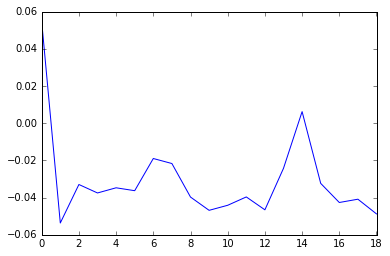

In [114]:
plt.plot(corr)
print(corr)

## From those plot we can assume that there is 7 pixels offset pattern present in this image
### Check this assumption and visualise results. (spoiler: those patterns are contact pins on a board)

circboar.png
7 Correlation mean [-0.0887451171875]


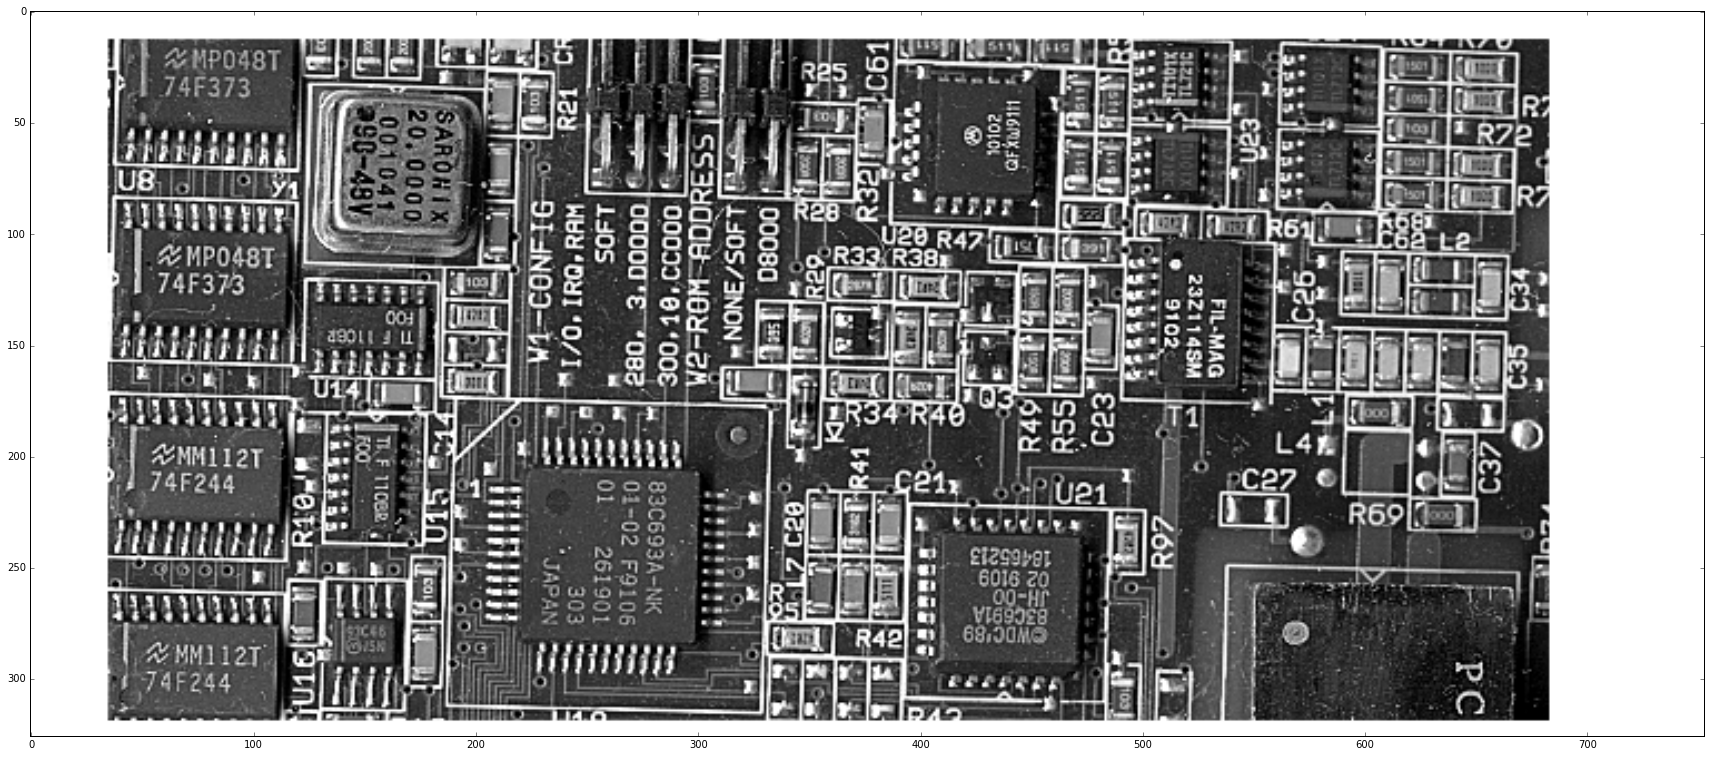

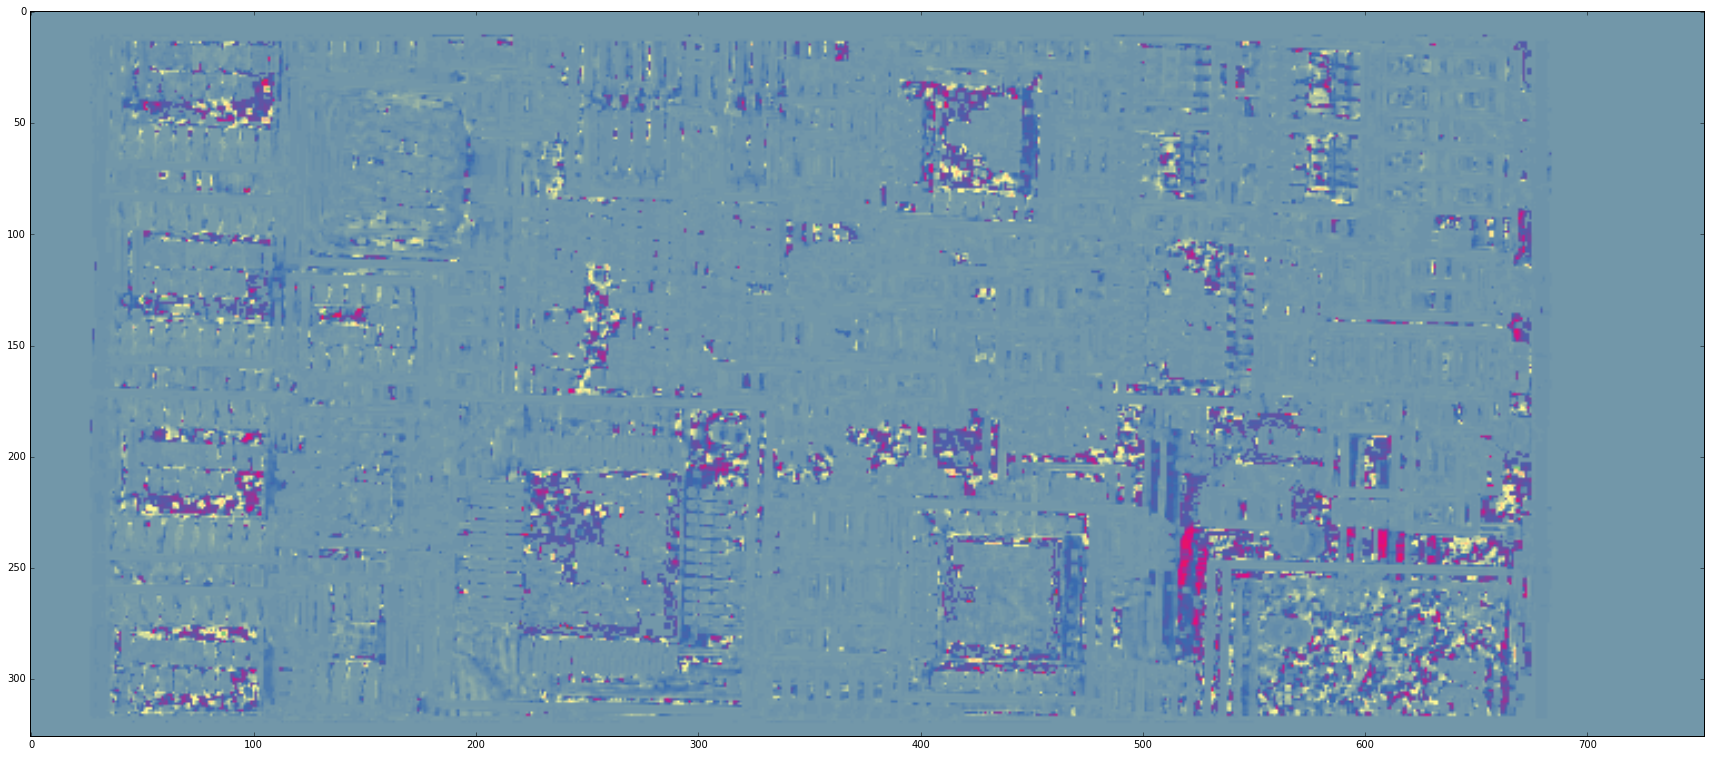

15 Correlation mean [-0.075927734375]


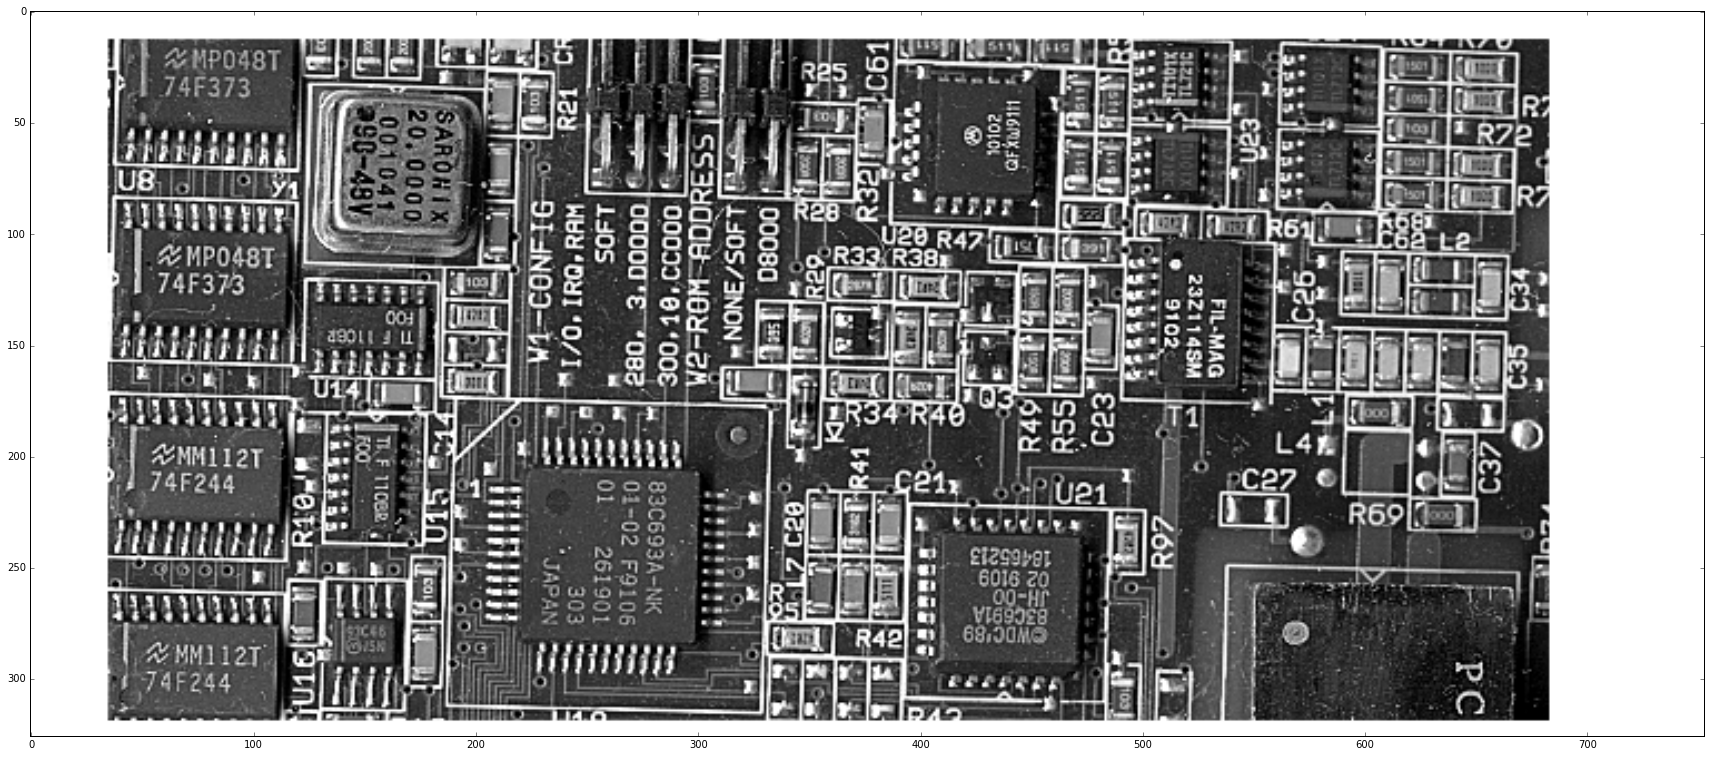

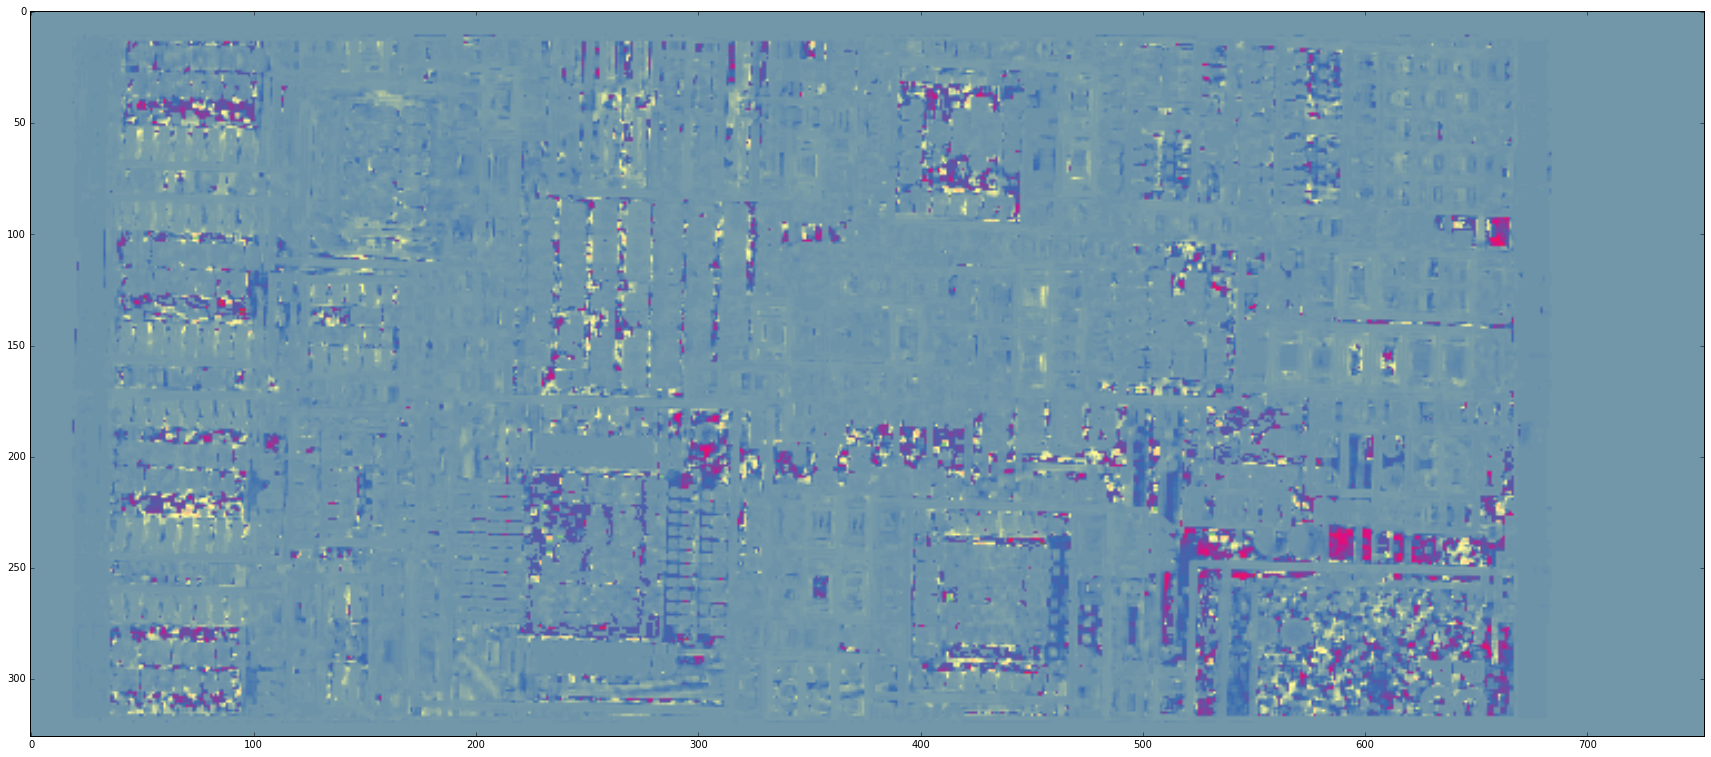

[-0.088745, -0.075928]


In [115]:
FIGSIZE = (30,30)
f_name = 'circboar.png'
infile = os.path.join('my_examples', f_name)
# for f_name in os.listdir('my_examples'):

print(f_name)
nb = 10
rad = 1
corr = []
for xoff in [7, 15]:
    infile = os.path.join('my_examples', f_name)
    outfile_name = ''.join(infile.split('/')[-1].split('.')[:-1]) + '_' + textures_mode + '.tiff'
    raw_im = extract_haralic(infile_name=infile,
                    outfile_name=outfile_name,
                        channel=1,
                        nbbin = nb,
                        xrad=rad,
                        yrad=rad,
                        xoff=xoff,
                        yoff=1,
                        textures=textures_mode)
    resulting_im = plot_haralic_features(infile=os.path.join('output', outfile_name),
                        channels=[2],
                        textures_mode = textures_mode,
                        blend_channels=False)
    corr.append(np.mean(resulting_im[0], dtype=np.float16))
    print(f'{xoff} Correlation mean [{np.mean(resulting_im[0], dtype=np.float16)}]')
    plt.figure(figsize=FIGSIZE)
    plt.imshow(raw_im, cmap='gray')
    plt.show()
    plt.figure(figsize=FIGSIZE)
    plt.imshow(resulting_im[0], cmap='Accent_r')
    plt.show()
print(corr)

## Haralic's Correlation

<img src="image_refs/Haralic's_correlation_f.png">

where mu and sigma are the mean and standard deviation of the row (or column, due to symmetry) sums.
As an example it can be used to detect borders in tought cases with multiple boundaries.

nucleus_1.jpg
my_examples/nucleus_1.jpg


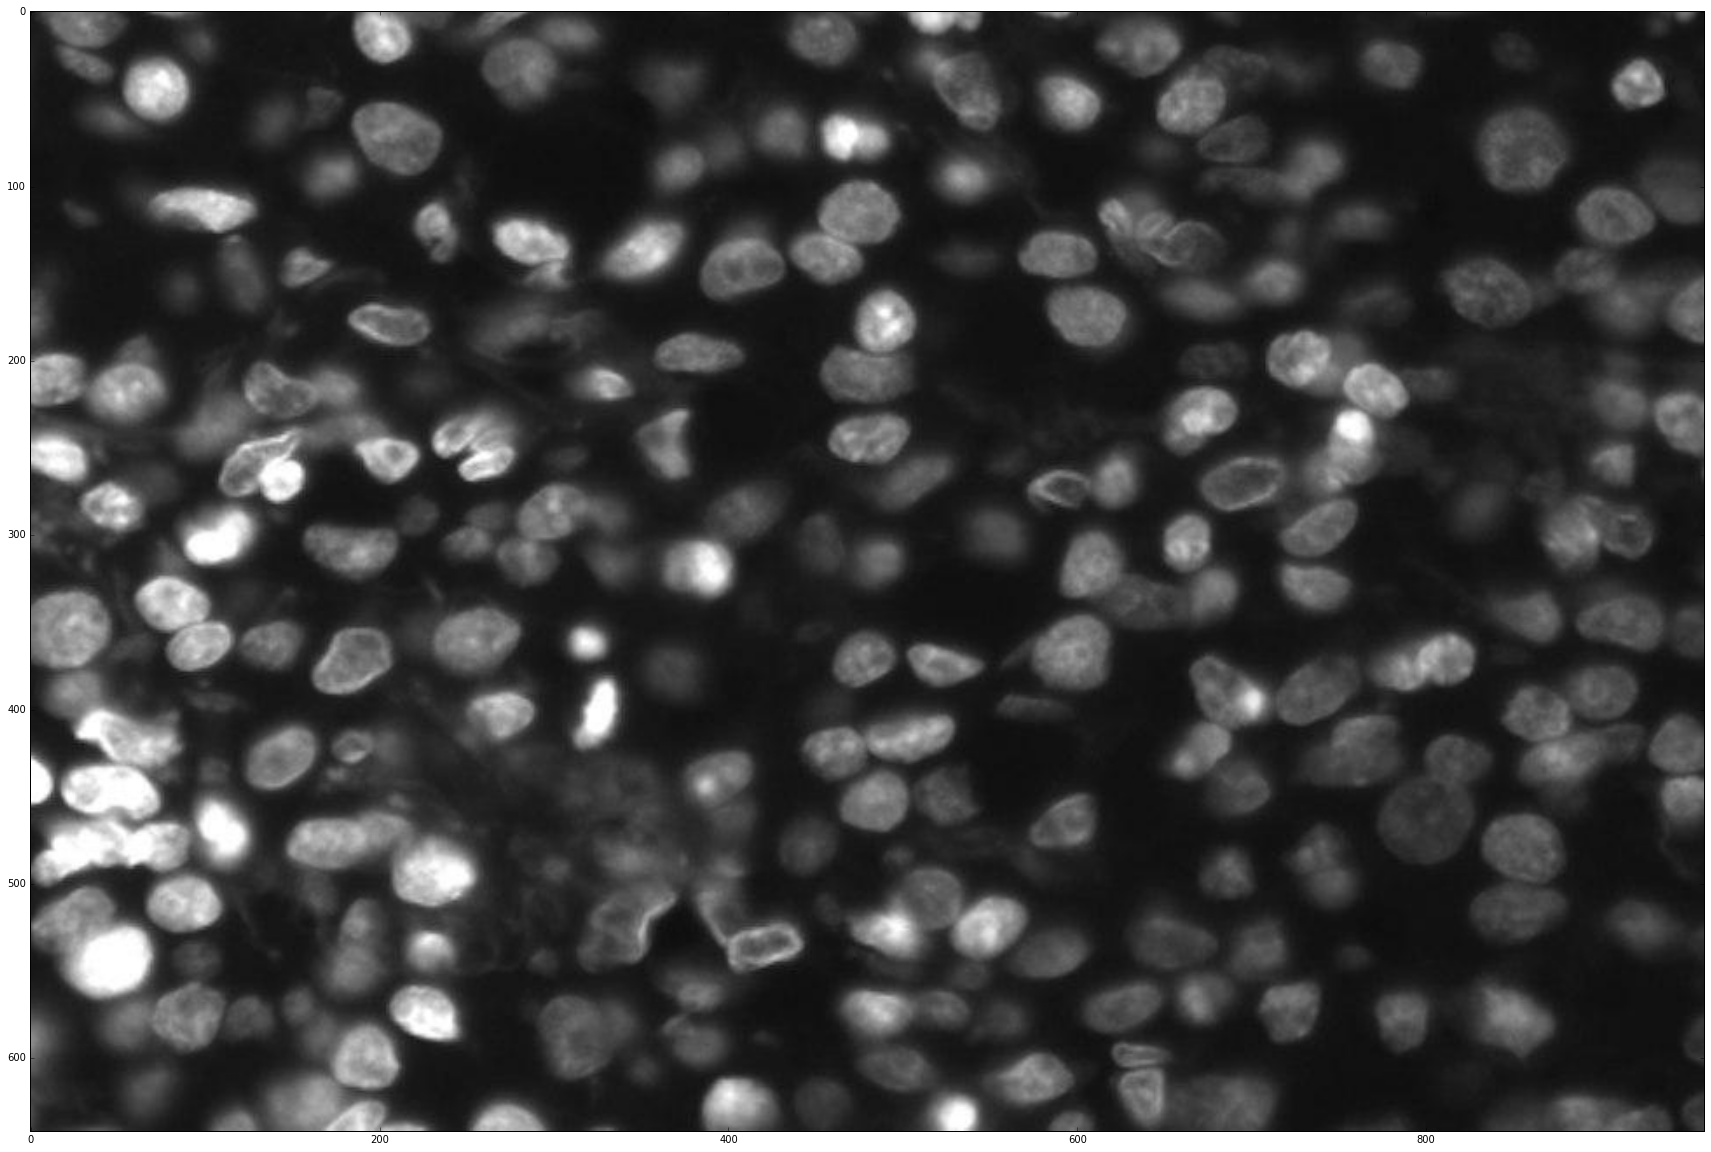

False


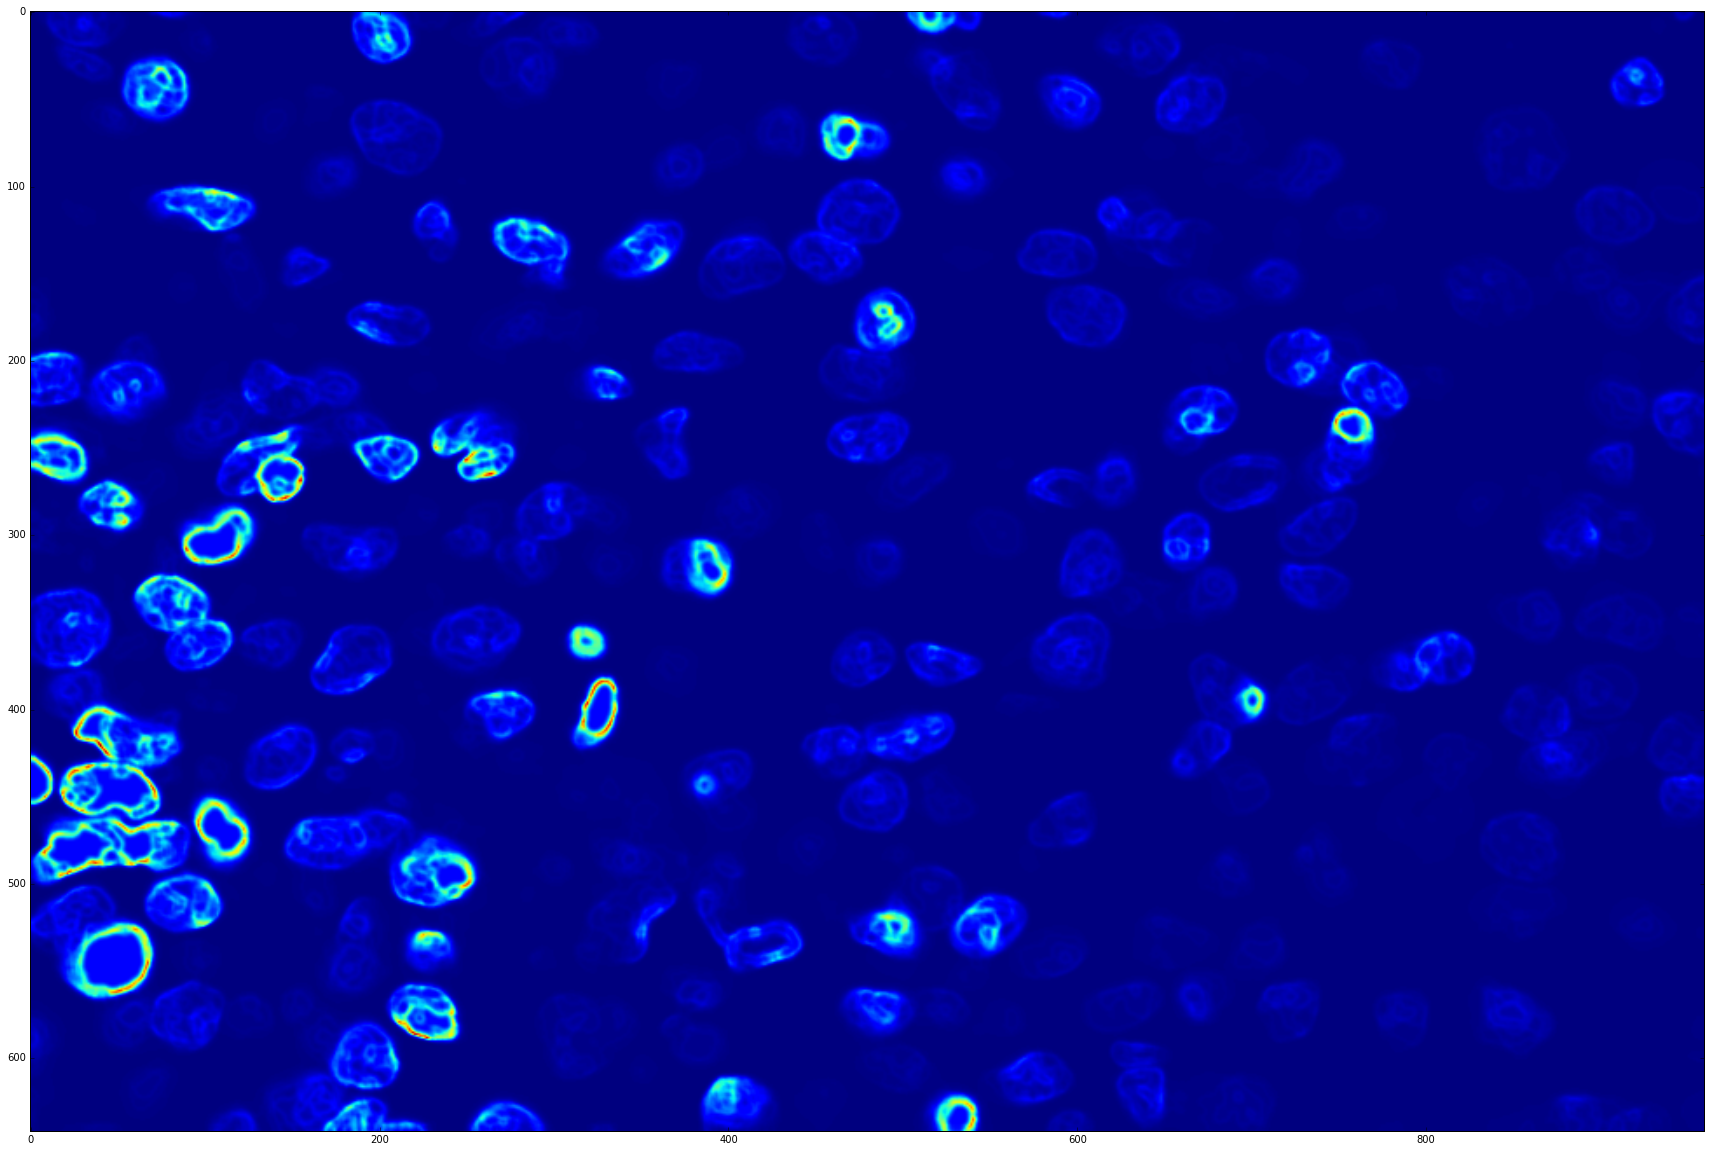

In [444]:
FIGSIZE = (30,30)
f_name = 'nucleus_1.jpg'
print(f_name)
nb = 32
rad = 2
textures_mode = 'simple'
infile = os.path.join('my_examples', f_name)
outfile_name = ''.join(infile.split('/')[-1].split('.')[:-1]) + '_' + textures_mode + '.tiff'
raw_im = extract_haralic(infile_name=infile,
                outfile_name=outfile_name,
                    channel=1,
                    nbbin = nb,
                    xrad=rad,
                    yrad=rad,
                    textures=textures_mode)
plt.figure(figsize=FIGSIZE)
plt.imshow(raw_im)
plt.show()
for chennals in ['all']:
    resulting_im = plot_haralic_features(infile=os.path.join('output', outfile_name),
                        channels=chennals,
                        textures_mode = textures_mode,
                        blend_channels=False, to_plot=False)
    
    im = resulting_im[-1]
    plt.figure(figsize=FIGSIZE)
    plt.imshow(im)
    plt.show()

Entropy is the randomness or the degree of disorder present in the image. The value of entropy is the largest when all elements of the cooccurrence matrix are the same and small when elements are unequal:

<img src="image_refs/entropy.png">

In [445]:
FIGSIZE = (10,10)
f_name = '1c41821d13.png'
nb = 100
rad = 3
infile = os.path.join('my_examples', f_name)
outfile_name = ''.join(infile.split('/')[-1].split('.')[:-1]) + '_' + textures_mode + '.tiff'
textures_mode = 'simple'
raw_im = extract_haralic(infile_name=infile,
                outfile_name=outfile_name,
                    channel=1,
                    nbbin = nb,
                    xrad=rad,
                    yrad=rad,
                    textures=textures_mode)
resulting_im = plot_haralic_features(infile=os.path.join('output', outfile_name),
                    channels='all',
                    textures_mode = textures_mode,
                    blend_channels=False)
print(f'Homogenity mean [{np.mean(resulting_im[0], dtype=np.float16)}]')

my_examples/1c41821d13.png
False
Homogenity mean [0.1573486328125]


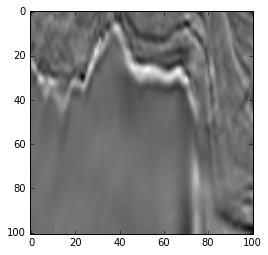

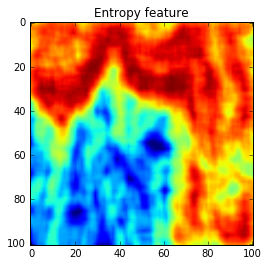

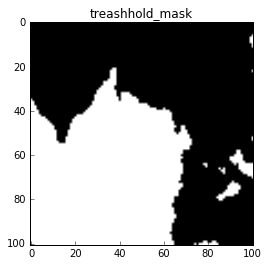

my_examples/mask_1c41821d13.png


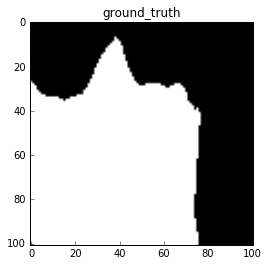

In [452]:
plt.imshow(raw_im)
plt.show()
normed = resulting_im[1] / np.max(resulting_im[1]) 
plt.imshow(normed)
plt.title('Entropy feature')
plt.show()
plt.imshow(
#     (resulting_im[0] + resulting_im[3] / np.max(resulting_im[3] ) ) /2 < 0.5 , cmap = 'gray')
 normed < 0.6, cmap = 'gray')
plt.title('treashhold_mask')
plt.show()
infile_name = os.path.join('my_examples', 'mask_1c41821d13.png')
ground_truth = get_input_img(infile_name)
plt.imshow(ground_truth , cmap = 'gray')
plt.title('ground_truth')
plt.show()

### Homogeneity (Inverse Difference Moment) measures how close the distribution of elements in the GLCM is to the diagonal of GLCM. As homogeneity increases, the contrast, typically, decreases:

<img src="image_refs/homogenity_formula.png">

## Example of homogenity:

Homogenity mean [0.60498046875]


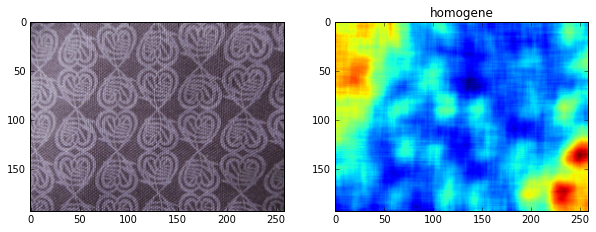

Homogenity mean [0.67041015625]


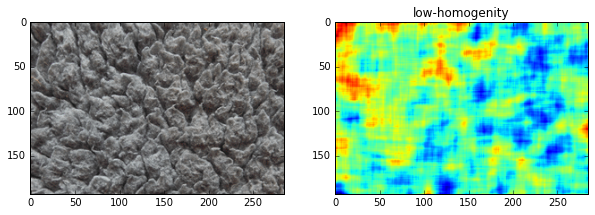

Homogenity mean [0.783203125]


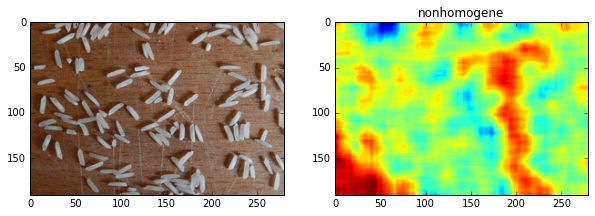

In [59]:
FIGSIZE = (10,10)
titles = ['homogene', 'low-homogenity', 'nonhomogene']
for f_name, title in zip(sorted(os.listdir('examples/homogenity'))[1::2], titles):
#     print(f_name)
    nb = 10
    rad = 10
    infile = os.path.join('examples/homogenity', f_name)
    outfile_name = ''.join(infile.split('/')[-1].split('.')[:-1]) + '_' + textures_mode + '.tiff'
    raw_im = extract_haralic(infile_name=infile,
                    outfile_name=outfile_name,
                        channel=1,
                        nbbin = nb,
                        xrad=rad,
                        yrad=rad,
                        textures=textures_mode)
    resulting_im = plot_haralic_features(infile=os.path.join('output', outfile_name),
                        channels=[3],
                        textures_mode = textures_mode,
                        blend_channels=False)
    print(f'Homogenity mean [{np.mean(resulting_im[0], dtype=np.float16)}]')
    plot_pair(raw_im, resulting_im[0], title)

Used references:
[1] Haralick, R.M., K. Shanmugan, and I. Dinstein, "Textural Features for Image Classification", IEEE Transactions on Systems, Man, and Cybernetics, Vol. SMC-3, 1973, pp. 610-621.

[2] Haralick, R.M., and L.G. Shapiro. Computer and Robot Vision: Vol. 1, Addison-Wesley, 1992, p. 459